<a href="https://colab.research.google.com/github/astrrr/ML-Lab/blob/main/Activity4ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [839]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [840]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 4.1 (a) Data exploration

In [841]:
df = pd.read_csv('/content/drive/MyDrive/ML/Lab4/CarPrice.csv')

In [842]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [843]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [844]:
df = df.drop(columns=['car_ID','CarName'])

In [845]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [846]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

# 4.1 (b) Data Transform and Feature Selection

*   Standardized Data for continuous data columns for only continuous data columns




In [847]:
continuous_data = ['symboling', 'wheelbase',	'carlength',	'carwidth',	'carheight',	'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',	'peakrpm',	'citympg',	'highwaympg']

In [848]:
x = df[continuous_data]
y = df[['price']]

In [849]:
x

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [850]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [851]:
x_scaler = preprocessing.StandardScaler()
x_transform = x_scaler.fit_transform(x)

In [852]:
x_transform

array([[ 1.74347043, -1.6907718 , -0.42652147, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [ 1.74347043, -1.6907718 , -0.42652147, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [ 0.133509  , -0.70859588, -0.23151305, ..., -0.26296022,
        -0.95301169, -0.69162706],
       ...,
       [-1.47645244,  1.72187336,  1.19854871, ...,  0.78785546,
        -1.10624102, -1.12833203],
       [-1.47645244,  1.72187336,  1.19854871, ..., -0.68328649,
         0.11959362, -0.54605874],
       [-1.47645244,  1.72187336,  1.19854871, ...,  0.57769233,
        -0.95301169, -0.83719538]])



*   Calculate correlation between variables for only continuous data columns




In [853]:
cor_data = x.corr()

In [854]:
cor_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201


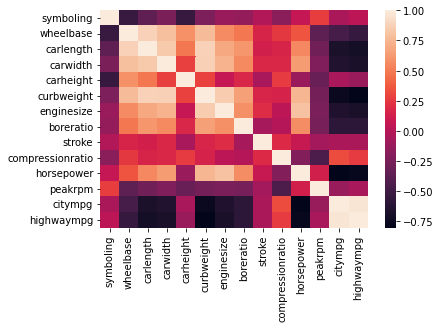

In [855]:
sns.heatmap(cor_data)



*   Reduce Corr() to Lower Matrix




In [856]:
lower = pd.DataFrame(np.tril(cor_data, -1), columns=cor_data.columns)

In [857]:
lower

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,-0.531954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,-0.357612,0.874587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,-0.232919,0.795144,0.841118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,-0.541038,0.589435,0.491029,0.279210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,-0.227691,0.776386,0.877728,0.867032,0.295572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,0.000000,0.000000,0.000000,0.000000,0.0




*   Drop columns if correlation value > 0.86




In [858]:
to_drop = []
for column in lower.columns:
  for i in lower[column]:
    if abs(i) > 0.86 :
     to_drop.append(column)

In [859]:
to_drop

['wheelbase', 'carlength', 'carwidth', 'citympg']

In [860]:
x

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [861]:
df.drop(to_drop, inplace=True, axis=1)

In [862]:
x.drop(to_drop, inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [863]:
x

,symboling,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg
0,3,48.8,2548,130,3.47,2.68,9.0,111,5000,27
1,3,48.8,2548,130,3.47,2.68,9.0,111,5000,27
2,1,52.4,2823,152,2.68,3.47,9.0,154,5000,26
3,2,54.3,2337,109,3.19,3.40,10.0,102,5500,30
4,2,54.3,2824,136,3.19,3.40,8.0,115,5500,22
...,...,...,...,...,...,...,...,...,...,...
200,-1,55.5,2952,141,3.78,3.15,9.5,114,5400,28
201,-1,55.5,3049,141,3.78,3.15,8.7,160,5300,25
202,-1,55.5,3012,173,3.58,2.87,8.8,134,5500,23
203,-1,55.5,3217,145,3.01,3.40,23.0,106,4800,27




*   OneHotEncode for categorical columns (try from Pandas)




In [864]:
discreat_data = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

In [865]:
one_hot = pd.get_dummies(df[discreat_data])

In [866]:
one_hot

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
201,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
202,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
203,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [867]:
x = x.join(one_hot)

In [868]:
x

,symboling,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,48.8,2548,130,3.47,2.68,9.0,111,5000,27,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,48.8,2548,130,3.47,2.68,9.0,111,5000,27,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,52.4,2823,152,2.68,3.47,9.0,154,5000,26,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,54.3,2337,109,3.19,3.40,10.0,102,5500,30,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,54.3,2824,136,3.19,3.40,8.0,115,5500,22,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,55.5,2952,141,3.78,3.15,9.5,114,5400,28,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
201,-1,55.5,3049,141,3.78,3.15,8.7,160,5300,25,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
202,-1,55.5,3012,173,3.58,2.87,8.8,134,5500,23,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
203,-1,55.5,3217,145,3.01,3.40,23.0,106,4800,27,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


# 4.2 PCA Dimensional Reduction

In [869]:
pca = PCA()
x_pca = pca.fit_transform(x_transform)



*   Visualize Explained Variance Ratio (% eigenvalues)




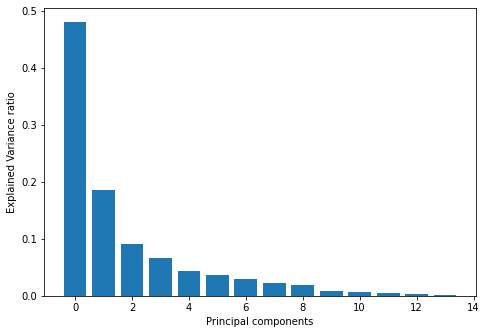

In [870]:
num_of_var = [] 
for i in range(len(pca.explained_variance_ratio_)):
  num_of_var.append(i)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(num_of_var,pca.explained_variance_ratio_)
ax.set_ylabel('Explained Variance ratio')
ax.set_xlabel('Principal components')
plt.show()

# PCA n_components (ทดลองเปลี่ยนค่า n_components อย่างน้อย 3 ค่า เพื่อเลือกค่าดีที่สุด)

In [871]:
pca2 = PCA(n_components=5)
x_pca2 = pca2.fit_transform(x_transform)



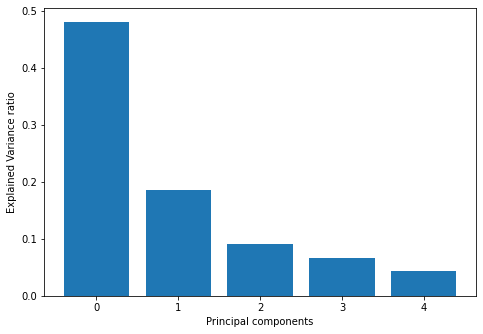

In [872]:
num_of_var = [] 
for i in range(len(pca2.explained_variance_ratio_)):
  num_of_var.append(i)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(num_of_var,pca2.explained_variance_ratio_)
ax.set_ylabel('Explained Variance ratio')
ax.set_xlabel('Principal components')
plt.show()

# 4.3 Linear Regression


*   Shuffle Split (Train / Test Split)




In [873]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [874]:
x

,symboling,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,48.8,2548,130,3.47,2.68,9.0,111,5000,27,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,48.8,2548,130,3.47,2.68,9.0,111,5000,27,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,52.4,2823,152,2.68,3.47,9.0,154,5000,26,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,54.3,2337,109,3.19,3.40,10.0,102,5500,30,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,54.3,2824,136,3.19,3.40,8.0,115,5500,22,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,55.5,2952,141,3.78,3.15,9.5,114,5400,28,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
201,-1,55.5,3049,141,3.78,3.15,8.7,160,5300,25,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
202,-1,55.5,3012,173,3.58,2.87,8.8,134,5500,23,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
203,-1,55.5,3217,145,3.01,3.40,23.0,106,4800,27,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [875]:
Rseed = 42
x_train_set, x_test, y_train_set, y_test = train_test_split(x, y, test_size = 0.3, random_state = Rseed)



*   Shuffle Split (Train / Validation Split)



In [876]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)



*   # Perform Linear Regression -> All variables




In [877]:
lr = LinearRegression()



*   Train




In [878]:
lr.fit(x_train, y_train)

LinearRegression()



*   Validate



In [879]:
y_pred_lr = lr.predict(x_validate) 



*   Test




In [880]:
y_test_pred_lr = lr.predict(x_test) 

* # Measure Accuracy Validation and Test





# No PCA

In [881]:
r2_validate = r2_score(y_pred_lr,y_validate) #validate
r2_test = r2_score(y_test_pred_lr, y_test) #test
scr_validate = lr.score(x_validate,y_validate)
scr_test = lr.score(x_test, y_test)



In [882]:
print('R_Square of validate : ',r2_validate)
print('R_Square of test     : ',r2_test)
print('acc of validate    : ',scr_validate)
print('acc of test        : ',scr_test)

R_Square of validate :  0.6792867249324877
R_Square of test     :  0.8357638116271023
acc of validate    :  0.7843747640490105
acc of test        :  0.8626746558421787


In [883]:
mse_validate = mean_squared_error(y_pred_lr,y_validate)
mse_test = mean_squared_error(y_test_pred_lr, y_test)

In [884]:
print('MSE of validate : ',mse_validate)
print('MSE of test     : ',mse_test)


MSE of validate :  19971188.895330563
MSE of test     :  9514501.137554454


In [885]:
NO_PCA = [r2_validate,r2_test,mse_validate,mse_test]

# Perform Linear Regression -> PCA

In [886]:
Rseed = 42
x_train_set, x_test, y_train_set, y_test = train_test_split(x_pca, y, test_size = 0.3, random_state = Rseed)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_validate)
y_test_pred_lr = lr.predict(x_test) 



*   Measurement




In [887]:
r2_validate = r2_score(y_pred_lr,y_validate) #validate
r2_test = r2_score(y_test_pred_lr, y_test) #test
scr_validate = lr.score(x_validate,y_validate)
scr_test = lr.score(x_test, y_test)
mse_validate = mean_squared_error(y_pred_lr,y_validate)
mse_test = mean_squared_error(y_test_pred_lr, y_test)



In [888]:
print('R_Square of validate : ',r2_validate)
print('R_Square of test     : ',r2_test)
print('acc of validate      : ',scr_validate)
print('acc of test          : ',scr_test)
print('MSE of validate      : ',mse_validate)
print('MSE of test          : ',mse_test)

R_Square of validate :  0.6393237843702817
R_Square of test     :  0.6143589931918588
acc of validate      :  0.8039254190289942
acc of test          :  0.7499834600467832
MSE of validate      :  18160409.086044062
MSE of test          :  17322240.61320023


transfrom data

In [889]:
x

,symboling,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,48.8,2548,130,3.47,2.68,9.0,111,5000,27,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,48.8,2548,130,3.47,2.68,9.0,111,5000,27,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,52.4,2823,152,2.68,3.47,9.0,154,5000,26,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,54.3,2337,109,3.19,3.40,10.0,102,5500,30,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,54.3,2824,136,3.19,3.40,8.0,115,5500,22,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,55.5,2952,141,3.78,3.15,9.5,114,5400,28,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
201,-1,55.5,3049,141,3.78,3.15,8.7,160,5300,25,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
202,-1,55.5,3012,173,3.58,2.87,8.8,134,5500,23,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
203,-1,55.5,3217,145,3.01,3.40,23.0,106,4800,27,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [890]:
x_scaler = preprocessing.StandardScaler()
x_transform = x_scaler.fit_transform(x)

In [891]:
pca2 = PCA(n_components=5)
x_pca2 = pca2.fit_transform(x_transform)

pca3 = PCA(n_components=10)
x_pca3 = pca3.fit_transform(x_transform)

pca4 = PCA(n_components=15)
x_pca4 = pca4.fit_transform(x_transform)

pca5 = PCA(n_components=20)
x_pca5 = pca5.fit_transform(x_transform)

pca6 = PCA(n_components=25)
x_pca6 = pca6.fit_transform(x_transform)

pca7 = PCA(n_components=30)
x_pca7 = pca7.fit_transform(x_transform)

In [892]:
Rseed = 42
x_train_set, x_test, y_train_set, y_test = train_test_split(x_pca2, y, test_size = 0.3, random_state = Rseed)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_validate)
y_test_pred_lr = lr.predict(x_test) 

r2_validate = r2_score(y_pred_lr,y_validate) #validate
r2_test = r2_score(y_test_pred_lr, y_test) #test
scr_validate = lr.score(x_validate,y_validate)
scr_test = lr.score(x_test, y_test)
mse_validate = mean_squared_error(y_pred_lr,y_validate)
mse_test = mean_squared_error(y_test_pred_lr, y_test)

PCA_5 = [r2_validate,r2_test,mse_validate,mse_test]

print('R_Square of validate : ',r2_validate)
print('R_Square of test     : ',r2_test)
print('acc of validate      : ',scr_validate)
print('acc of test          : ',scr_test)
print('MSE of validate      : ',mse_validate)
print('MSE of test          : ',mse_test)

R_Square of validate :  0.5717532765730271
R_Square of test     :  0.5278093106831003
acc of validate      :  0.7898056635243574
acc of test          :  0.7359810204159862
MSE of validate      :  19468179.50120585
MSE of test          :  18292390.942061923


In [893]:
Rseed = 42
x_train_set, x_test, y_train_set, y_test = train_test_split(x_pca3, y, test_size = 0.3, random_state = Rseed)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_validate)
y_test_pred_lr = lr.predict(x_test) 

r2_validate = r2_score(y_pred_lr,y_validate) #validate
r2_test = r2_score(y_test_pred_lr, y_test) #test
scr_validate = lr.score(x_validate,y_validate)
scr_test = lr.score(x_test, y_test)
mse_validate = mean_squared_error(y_pred_lr,y_validate)
mse_test = mean_squared_error(y_test_pred_lr, y_test)

PCA_10 = [r2_validate,r2_test,mse_validate,mse_test]

print('R_Square of validate : ',r2_validate)
print('R_Square of test     : ',r2_test)
print('acc of validate      : ',scr_validate)
print('acc of test          : ',scr_test)
print('MSE of validate      : ',mse_validate)
print('MSE of test          : ',mse_test)

R_Square of validate :  0.7574847373554274
R_Square of test     :  0.6675276556977545
acc of validate      :  0.8198593503467011
acc of test          :  0.7324610799728619
MSE of validate      :  16684609.879204115
MSE of test          :  18536267.828412496


In [894]:
Rseed = 42
x_train_set, x_test, y_train_set, y_test = train_test_split(x_pca4, y, test_size = 0.3, random_state = Rseed)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_validate)
y_test_pred_lr = lr.predict(x_test) 

r2_validate = r2_score(y_pred_lr,y_validate) #validate
r2_test = r2_score(y_test_pred_lr, y_test) #test
scr_validate = lr.score(x_validate,y_validate)
scr_test = lr.score(x_test, y_test)
mse_validate = mean_squared_error(y_pred_lr,y_validate)
mse_test = mean_squared_error(y_test_pred_lr, y_test)

PCA_15 = [r2_validate,r2_test,mse_validate,mse_test]

print('R_Square of validate : ',r2_validate)
print('R_Square of test     : ',r2_test)
print('acc of validate      : ',scr_validate)
print('acc of test          : ',scr_test)
print('MSE of validate      : ',mse_validate)
print('MSE of test          : ',mse_test)

R_Square of validate :  0.6579046483942282
R_Square of test     :  0.686048773318949
acc of validate      :  0.716334553450986
acc of test          :  0.7481211231168685
MSE of validate      :  26273066.745287225
MSE of test          :  17451271.470154207


In [895]:
Rseed = 42
x_train_set, x_test, y_train_set, y_test = train_test_split(x_pca5, y, test_size = 0.3, random_state = Rseed)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_validate)
y_test_pred_lr = lr.predict(x_test) 

r2_validate = r2_score(y_pred_lr,y_validate) #validate
r2_test = r2_score(y_test_pred_lr, y_test) #test
scr_validate = lr.score(x_validate,y_validate)
scr_test = lr.score(x_test, y_test)
mse_validate = mean_squared_error(y_pred_lr,y_validate)
mse_test = mean_squared_error(y_test_pred_lr, y_test)

PCA_20 = [r2_validate,r2_test,mse_validate,mse_test]

print('R_Square of validate : ',r2_validate)
print('R_Square of test     : ',r2_test)
print('acc of validate      : ',scr_validate)
print('acc of test          : ',scr_test)
print('MSE of validate      : ',mse_validate)
print('MSE of test          : ',mse_test)

R_Square of validate :  0.3979754206523958
R_Square of test     :  0.783400127703714
acc of validate      :  -0.16001037385372796
acc of test          :  0.8031977337088154
MSE of validate      :  107440050.764937
MSE of test          :  13635322.729275864


In [896]:
Rseed = 42
x_train_set, x_test, y_train_set, y_test = train_test_split(x_pca6, y, test_size = 0.3, random_state = Rseed)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_validate)
y_test_pred_lr = lr.predict(x_test) 

r2_validate = r2_score(y_pred_lr,y_validate) #validate
r2_test = r2_score(y_test_pred_lr, y_test) #test
scr_validate = lr.score(x_validate,y_validate)
scr_test = lr.score(x_test, y_test)
mse_validate = mean_squared_error(y_pred_lr,y_validate)
mse_test = mean_squared_error(y_test_pred_lr, y_test)

PCA_25 = [r2_validate,r2_test,mse_validate,mse_test]

print('R_Square of validate : ',r2_validate)
print('R_Square of test     : ',r2_test)
print('acc of validate      : ',scr_validate)
print('acc of test          : ',scr_test)
print('MSE of validate      : ',mse_validate)
print('MSE of test          : ',mse_test)

R_Square of validate :  0.4325143733947755
R_Square of test     :  0.7461041549699703
acc of validate      :  0.06895248248303898
acc of test          :  0.7360511478020046
MSE of validate      :  86233532.73494467
MSE of test          :  18287532.209698007


In [897]:
Rseed = 42
x_train_set, x_test, y_train_set, y_test = train_test_split(x_pca7, y, test_size = 0.3, random_state = Rseed)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_validate)
y_test_pred_lr = lr.predict(x_test) 

r2_validate = r2_score(y_pred_lr,y_validate) #validate
r2_test = r2_score(y_test_pred_lr, y_test) #test
scr_validate = lr.score(x_validate,y_validate)
scr_test = lr.score(x_test, y_test)
mse_validate = mean_squared_error(y_pred_lr,y_validate)
mse_test = mean_squared_error(y_test_pred_lr, y_test)

PCA_30 = [r2_validate,r2_test,mse_validate,mse_test]

print('R_Square of validate : ',r2_validate)
print('R_Square of test     : ',r2_test)
print('acc of validate      : ',scr_validate)
print('acc of test          : ',scr_test)
print('MSE of validate      : ',mse_validate)
print('MSE of test          : ',mse_test)

R_Square of validate :  0.32198713464118855
R_Square of test     :  0.10260251095841522
acc of validate      :  -1.4306953375332636
acc of test          :  -4.467015284775479
MSE of validate      :  225130771.5387723
MSE of test          :  378778756.8640247


# Compare Linear Regression

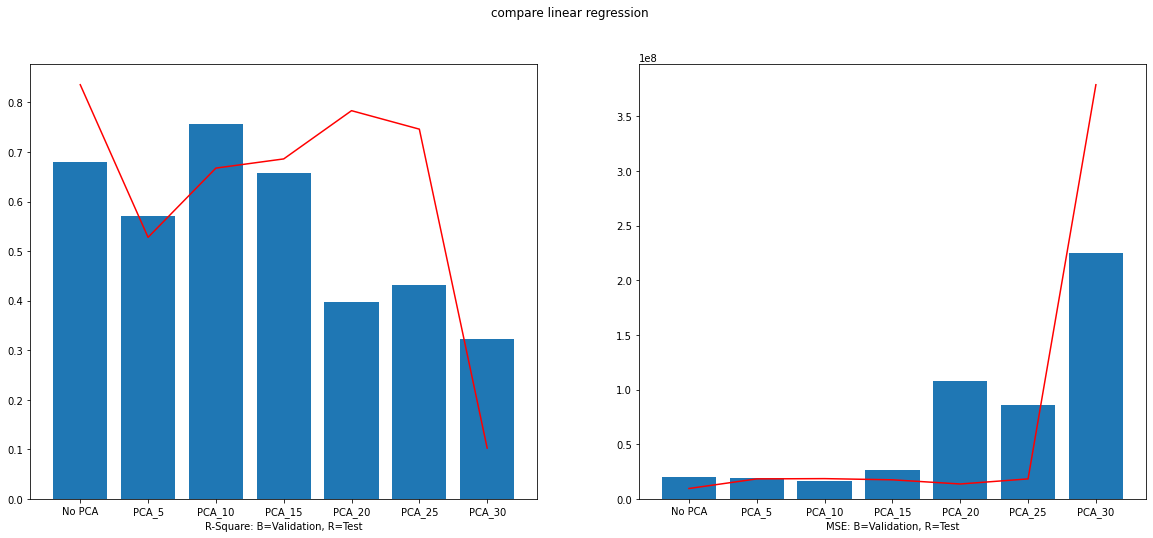

In [898]:
# index of result [r2_validate, r2_test, MSE_validate, MSE_test]
# for i in NO_PCA:
#   print(i)
validation_r2 = [NO_PCA[0],PCA_5[0], PCA_10[0],PCA_15[0],PCA_20[0],PCA_25[0],PCA_30[0]]
test_r2 = [NO_PCA[1],PCA_5[1], PCA_10[1],PCA_15[1],PCA_20[1],PCA_25[1],PCA_30[1]]

validation_mse = [NO_PCA[2],PCA_5[2], PCA_10[2],PCA_15[2],PCA_20[2],PCA_25[2],PCA_30[2]]
test_mse = [NO_PCA[3],PCA_5[3], PCA_10[3],PCA_15[3],PCA_20[3],PCA_25[3],PCA_30[3]]

model_pca = ['No PCA', 'PCA_5', 'PCA_10', 'PCA_15', 'PCA_20', 'PCA_25', 'PCA_30'] 

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches((20,8))
fig.suptitle('compare linear regression')
ax1.bar(model_pca,validation_r2)
ax1.plot(model_pca,test_r2,color='red')


ax2.bar(model_pca,validation_mse)
ax2.plot(model_pca,test_mse,color='red')


#ax.set_ylabel('Explained Variance ratio')
ax1.set_xlabel('R-Square: B=Validation, R=Test')
ax2.set_xlabel('MSE: B=Validation, R=Test')
plt.show()